# Importando bibliotecas e o dataset

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

In [2]:
chess_games = pd.read_csv("https://raw.githubusercontent.com/Vinicius-resende-cin/intro-dados/master/data/chess_games.csv", encoding = "ISO-8859-1")

In [3]:
chess_games.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


# Definição de tipos

In [4]:
# verificando os tipos de todas as colunas
chess_games.dtypes

id                 object
rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status     object
winner             object
increment_code     object
white_id           object
white_rating        int64
black_id           object
black_rating        int64
moves              object
opening_eco        object
opening_name       object
opening_ply         int64
dtype: object

In [5]:
# convertendo 'object' para 'category'
chess_games['id'] = chess_games['id'].astype('category')
chess_games['victory_status'] = chess_games['victory_status'].astype('category')
chess_games['winner'] = chess_games['winner'].astype('category')
chess_games['increment_code'] = chess_games['increment_code'].astype('category')
chess_games['white_id'] = chess_games['white_id'].astype('category')
chess_games['black_id'] = chess_games['black_id'].astype('category')
chess_games['moves'] = chess_games['moves'].astype('category')
chess_games['opening_eco'] = chess_games['opening_eco'].astype('category')
chess_games['opening_name'] = chess_games['opening_name'].astype('category')

In [6]:
# verificando novos tipos
chess_games.dtypes

id                category
rated                 bool
created_at         float64
last_move_at       float64
turns                int64
victory_status    category
winner            category
increment_code    category
white_id          category
white_rating         int64
black_id          category
black_rating         int64
moves             category
opening_eco       category
opening_name      category
opening_ply          int64
dtype: object

In [7]:
# listando nomes de cada abertura
chess_games['opening_name'].cat.categories

Index(['Alekhine Defense', 'Alekhine Defense #2', 'Alekhine Defense #3',
       'Alekhine Defense: Balogh Variation',
       'Alekhine Defense: Brooklyn Variation',
       'Alekhine Defense: Exchange Variation',
       'Alekhine Defense: Four Pawns Attack',
       'Alekhine Defense: Four Pawns Attack |  6...Nc6',
       'Alekhine Defense: Four Pawns Attack |  Fianchetto Variation',
       'Alekhine Defense: Four Pawns Attack |  Main Line',
       ...
       'Zukertort Opening: Quiet System',
       'Zukertort Opening: Reversed Mexican Defense',
       'Zukertort Opening: Ross Gambit',
       'Zukertort Opening: Santasiere's Folly',
       'Zukertort Opening: Sicilian Invitation',
       'Zukertort Opening: Slav Invitation',
       'Zukertort Opening: Tennison Gambit', 'Zukertort Opening: The Walrus',
       'Zukertort Opening: Vos Gambit', 'Zukertort Opening: Wade Defense'],
      dtype='object', length=1477)

In [8]:
# listando códigos das aberturas
chess_games['opening_eco'].cat.categories

Index(['A00', 'A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09',
       ...
       'E81', 'E87', 'E88', 'E90', 'E91', 'E92', 'E94', 'E95', 'E97', 'E98'],
      dtype='object', length=365)

In [9]:
# os códigos não trazem informação útil como dados categóricos, já que os nomes das aberturas já são fornecidos
# sendo assim, essa coluna será convertida para um tipo numérico
chess_games['opening_eco'] = chess_games['opening_eco'].cat.codes

In [10]:
chess_games.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,248,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,71,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,171,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,241,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,192,Philidor Defense,5


# Tratamento de dados ausentes

In [11]:
chess_games.shape

(20058, 16)

In [12]:
# verificando se há dados ausentes
print(chess_games.isnull().sum())

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64


O dataset selecionado não contém dados ausentes, portanto será feita uma remoção aleatória de dados para que possa ser realizada uma imputação em seguida

# Estatísticas Descritivas

## Distribuição dos ratings de todos os jogadores

In [ ]:
all_ratings = pd.concat([chess_games['white_rating'], chess_games['black_rating']])

In [ ]:
all_ratings.describe()

count    40116.000000
mean      1592.731927
std        291.167262
min        784.000000
25%       1394.000000
50%       1564.000000
75%       1788.000000
max       2723.000000
dtype: float64

<Axes: >

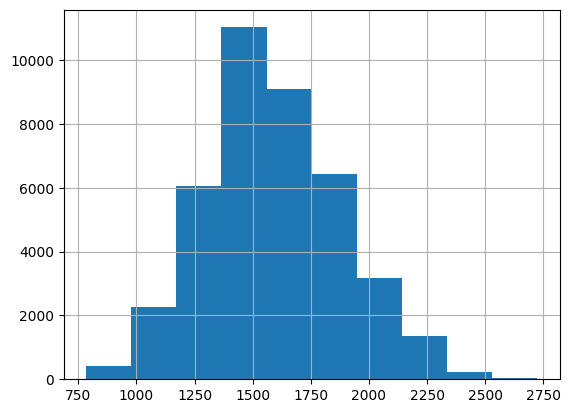

In [ ]:
all_ratings.hist()

<Axes: >

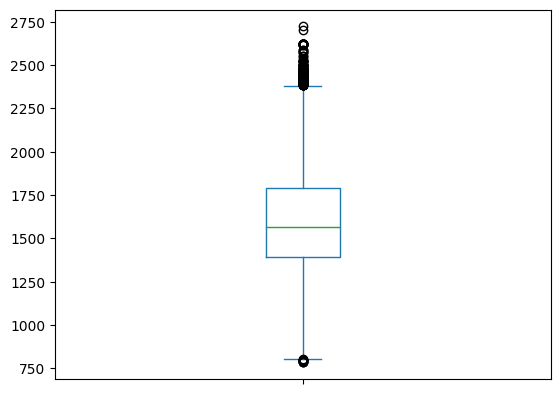

In [ ]:
all_ratings.plot.box()